<a href="https://colab.research.google.com/github/vivekprj0712/Lok-Sabha-Election-2004-2024-Data-Analysis-Visualization/blob/master/LokSabha_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import f_oneway
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
!gdown 1ozqFX6grhaqdtqz7mZNcOW6U22BxfKZw_G9nCDaUkIE

Downloading...
From (original): https://drive.google.com/uc?id=1ozqFX6grhaqdtqz7mZNcOW6U22BxfKZw_G9nCDaUkIE
From (redirected): https://docs.google.com/spreadsheets/d/1ozqFX6grhaqdtqz7mZNcOW6U22BxfKZw_G9nCDaUkIE/export?format=xlsx
To: /content/Final_Election_Data (2004-2024).xlsx
225kB [00:00, 74.1MB/s]


In [3]:
df = pd.read_excel('Final_Election_Data (2004-2024).xlsx')
df

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,4.9,2004
1,Adoor,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,8.0,2004
2,Agra,GEN,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,8.9,2004
3,Ahmedabad,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,14.2,2004
4,Ahmednagar,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,10.9,2004
...,...,...,...,...,...,...,...,...,...,...,...
2708,Wardha,GEN,Maharashtra,Amar Sharadrao Kale,Nationalist Congress Party – Sharadchandra Pawar,1682771,1095012,65.1,81648,7.5,2024
2709,Wayanad,GEN,Kerala,Rahul Gandhi,Indian National Congress,1462423,1084653,74.2,364422,33.6,2024
2710,West Delhi,GEN,Delhi,Kamaljeet Sehrawat,Bharatiya Janta Party,2587977,1524494,58.9,199013,13.1,2024
2711,Yavatmal-Washi,GEN,Maharashtra,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),1940916,1225530,63.1,94473,7.7,2024


#Winning Margin by State:

In [4]:
data = df.groupby('State')['Margin %'].mean().reset_index()
data

,State,Margin %
0,Andaman & Nicobar Islands,7.680000
1,Andhra Pradesh,9.864780
2,Arunachal Pradesh,20.590000
3,Assam,12.884058
4,Bihar,13.086500
5,Chandigarh,12.060000
6,Chhattisgarh,10.352727
7,Dadra & Nagar Haveli,10.420000
8,Daman & Diu,13.260000
9,Delhi,18.580000


In [5]:
data.sort_values(by='Margin %', ascending=False)

,State,Margin %
33,Tripura,40.590000
25,Nagaland,26.980000
30,Sikkim,22.860000
18,Ladakh,20.600000
2,Arunachal Pradesh,20.590000
11,Gujarat,20.376154
20,Madhya Pradesh,19.300000
9,Delhi,18.580000
35,Uttarakhand,18.540000
31,Tamil Nadu,17.924227


In [6]:
data.describe()

,Margin %
count,37.000000
mean,14.916293
std,6.492277
min,3.320000
25%,10.900000
50%,13.260000
75%,17.924227
max,40.590000


<function matplotlib.pyplot.show(close=None, block=None)>

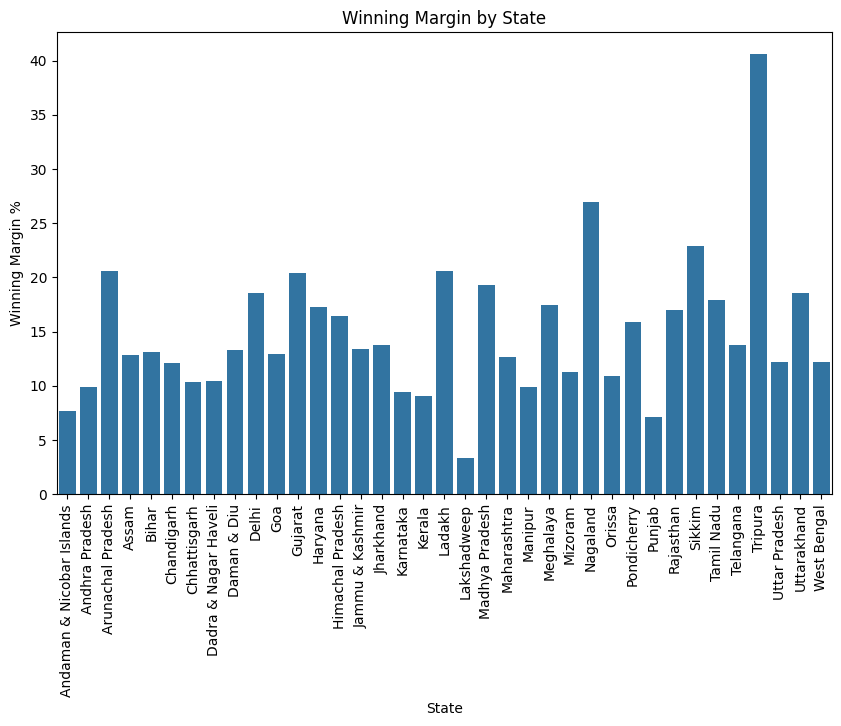

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Margin %', data=data)
plt.title('Winning Margin by State')
plt.xlabel('State')
plt.ylabel('Winning Margin %')
plt.xticks(rotation=90)
plt.show

**Is there a significant difference in the winning margin percentages across different states?**

In [8]:
#z-test
h0 = "There is no significant difference in winning margin percentages across different states."
h1 = "There is a significant difference in winning margin percentages across different states."
mu=14.92
sig_p = 6.49
n = 37
alpha = 0.05
sig_s = sig_p/np.sqrt(n)
z = (mu - sig_p) / sig_s
print("Z Value : " ,z)
p = 1 - norm.cdf(z)
print("P Value : " , p)
if p < alpha:
    print("Reject H0 and hence,")
    print(h1)
else:
    print("Failed to reject H0 and hence,")
    print(h0)

Z Value :  7.901030528569182
P Value :  1.3322676295501878e-15
Reject H0 and hence,
There is a significant difference in winning margin percentages across different states.


#Party Success by State:

**Is there a significant difference in the success rate (winning rate) of a political party across different states?**

Null Hypothesis (H0): There is no significant difference in the success rate of Party A across different states.

Alternative Hypothesis (H1): There is a significant difference in the success rate of Party A across different states.



In [9]:
df

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,4.9,2004
1,Adoor,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,8.0,2004
2,Agra,GEN,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,8.9,2004
3,Ahmedabad,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,14.2,2004
4,Ahmednagar,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,10.9,2004
...,...,...,...,...,...,...,...,...,...,...,...
2708,Wardha,GEN,Maharashtra,Amar Sharadrao Kale,Nationalist Congress Party – Sharadchandra Pawar,1682771,1095012,65.1,81648,7.5,2024
2709,Wayanad,GEN,Kerala,Rahul Gandhi,Indian National Congress,1462423,1084653,74.2,364422,33.6,2024
2710,West Delhi,GEN,Delhi,Kamaljeet Sehrawat,Bharatiya Janta Party,2587977,1524494,58.9,199013,13.1,2024
2711,Yavatmal-Washi,GEN,Maharashtra,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),1940916,1225530,63.1,94473,7.7,2024


In [10]:
df_party = df.groupby(['State', 'Party'])['Margin %'].mean().reset_index().sort_values(by='Margin %', ascending=False)
df_party



,State,Party,Margin %
159,Tripura,Communist Party Of India (Marxist),44.216667
117,Nagaland,Nagaland Peoples Front,44.050000
116,Nagaland,Naga Peoples Front,38.500000
111,Meghalaya,Voice Of The People Party,35.800000
158,Tripura,Bharatiya Janta Party,35.150000
...,...,...,...
50,Haryana,Haryana Janhit Congress (BL),0.800000
89,Madhya Pradesh,Bahujan Samaj Party,0.700000
92,Maharashtra,All India Majlis-E-Ittehadul Muslimeen,0.400000
87,Lakshadweep,Janata Dal (United),0.200000


In [11]:
df_party.describe()

,Margin %
count,183.000000
mean,12.253042
std,7.587512
min,0.100000
25%,6.712500
50%,11.510000
75%,15.652083
max,44.216667


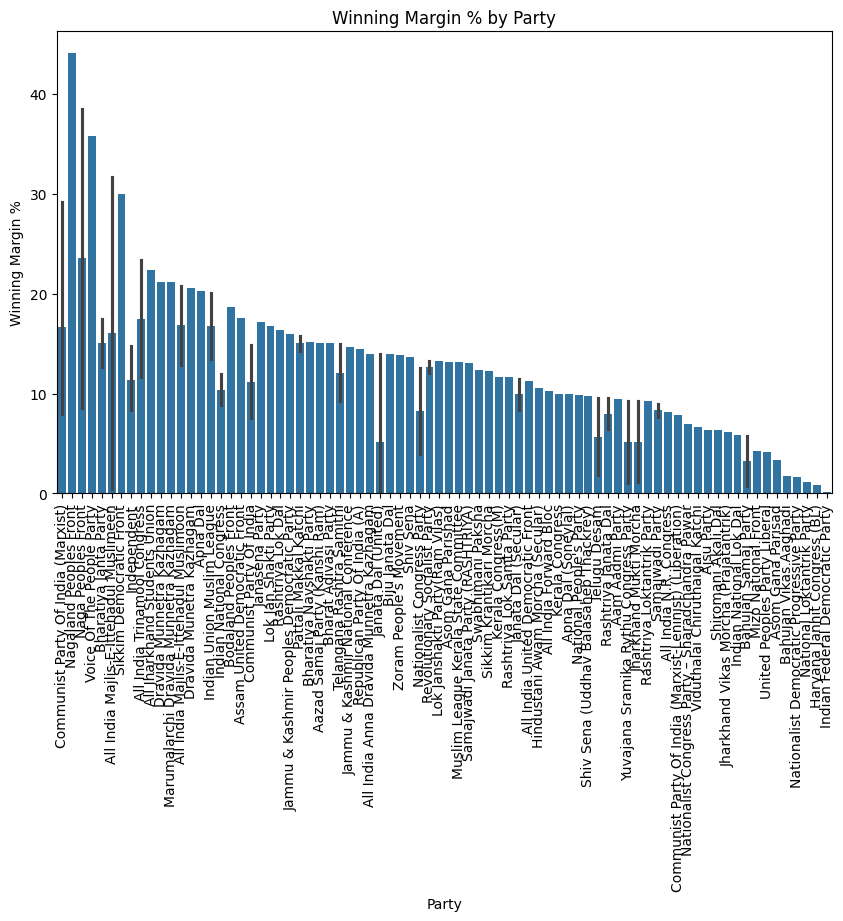

In [12]:
# Bar plot to compare Margin % across different parties
plt.figure(figsize=(10, 6))
sns.barplot(data=df_party, x='Party', y='Margin %')
plt.xlabel('Party')
plt.ylabel('Winning Margin %')
plt.title('Winning Margin % by Party')
plt.xticks(rotation=90)
plt.show()


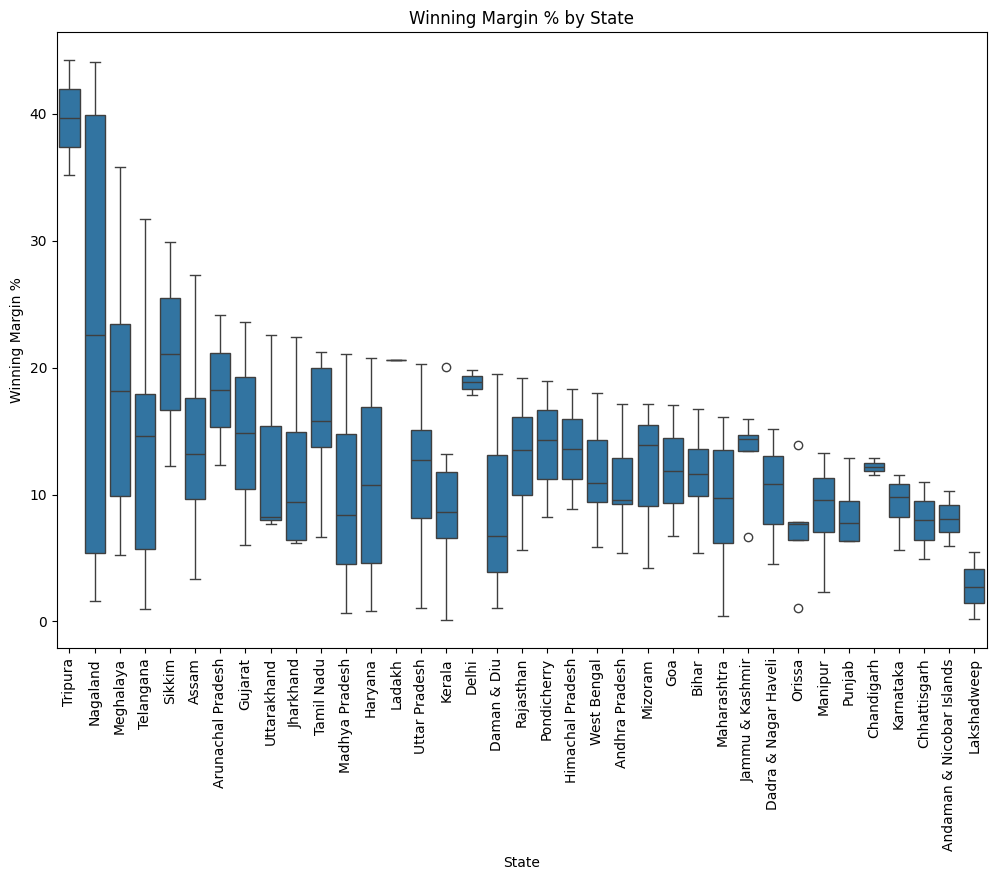

In [13]:
# Box plot to compare Margin % across different states
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_party, x='State', y='Margin %')
plt.xlabel('State')
plt.ylabel('Winning Margin %')
plt.title('Winning Margin % by State')
plt.xticks(rotation=90)
plt.show()

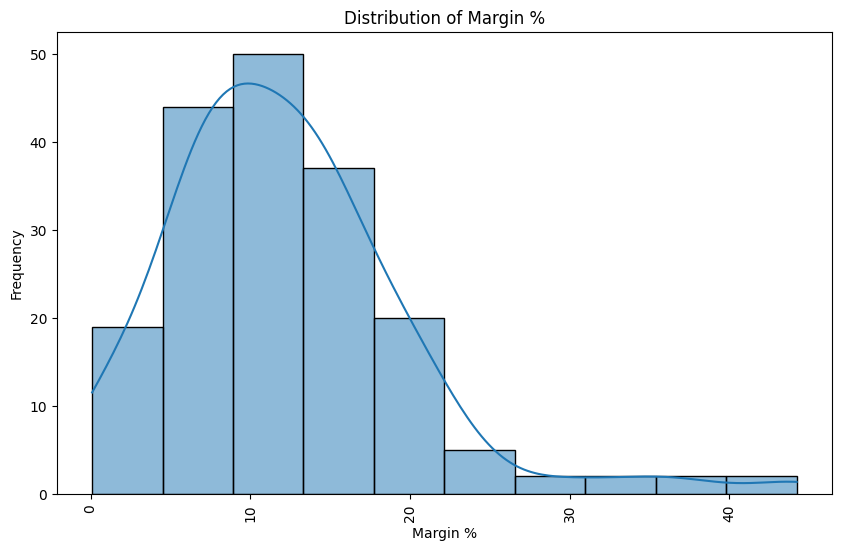

In [14]:
  # Visualize the distribution of Margin % using histograms
plt.figure(figsize=(10, 6))
sns.histplot(df_party['Margin %'], bins=10, kde=True)
plt.title('Distribution of Margin %')
plt.xlabel('Margin %')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Calculate the number of wins for each party in each state
win_counts = df.groupby(['State', 'Party']).size().reset_index(name='Winning_Count')
win_counts

,State,Party,Winning_Count
0,Andaman & Nicobar Islands,Bharatiya Janta Party,3
1,Andaman & Nicobar Islands,Indian National Congress,2
2,Andhra Pradesh,All India Majlis-E-Ittehadul Muslimoon,2
3,Andhra Pradesh,Bharatiya Janta Party,5
4,Andhra Pradesh,Communist Party Of India,1
...,...,...,...
178,West Bengal,Communist Party Of India,5
179,West Bengal,Communist Party Of India (Marxist),37
180,West Bengal,Independent,1
181,West Bengal,Indian National Congress,19


In [16]:
# Calculate the total number of elections in each state
total_elections = df.groupby('State').size().reset_index(name='Total_Elections')
total_elections

,State,Total_Elections
0,Andaman & Nicobar Islands,5
1,Andhra Pradesh,159
2,Arunachal Pradesh,10
3,Assam,69
4,Bihar,200
5,Chandigarh,5
6,Chhattisgarh,55
7,Dadra & Nagar Haveli,5
8,Daman & Diu,5
9,Delhi,35


In [17]:
# Merge the win counts with the total elections
win_counts = win_counts.merge(total_elections, on='State')
win_counts


,State,Party,Winning_Count,Total_Elections
0,Andaman & Nicobar Islands,Bharatiya Janta Party,3,5
1,Andaman & Nicobar Islands,Indian National Congress,2,5
2,Andhra Pradesh,All India Majlis-E-Ittehadul Muslimoon,2,159
3,Andhra Pradesh,Bharatiya Janta Party,5,159
4,Andhra Pradesh,Communist Party Of India,1,159
...,...,...,...,...
178,West Bengal,Communist Party Of India,5,210
179,West Bengal,Communist Party Of India (Marxist),37,210
180,West Bengal,Independent,1,210
181,West Bengal,Indian National Congress,19,210


In [18]:
# Calculate the winning rate
win_counts['Winning_Rate'] = (win_counts['Winning_Count'] / win_counts['Total_Elections'])*100
win_counts

,State,Party,Winning_Count,Total_Elections,Winning_Rate
0,Andaman & Nicobar Islands,Bharatiya Janta Party,3,5,60.000000
1,Andaman & Nicobar Islands,Indian National Congress,2,5,40.000000
2,Andhra Pradesh,All India Majlis-E-Ittehadul Muslimoon,2,159,1.257862
3,Andhra Pradesh,Bharatiya Janta Party,5,159,3.144654
4,Andhra Pradesh,Communist Party Of India,1,159,0.628931
...,...,...,...,...,...
178,West Bengal,Communist Party Of India,5,210,2.380952
179,West Bengal,Communist Party Of India (Marxist),37,210,17.619048
180,West Bengal,Independent,1,210,0.476190
181,West Bengal,Indian National Congress,19,210,9.047619


In [19]:
win_counts['Party'].value_counts()

Party
Indian National Congress                            33
Bharatiya Janta Party                               30
Independent                                         15
Communist Party Of India                             6
Communist Party Of India (Marxist)                   6
                                                    ..
Nationalist Congress Party – Sharadchandra Pawar     1
Republican Party Of India (A)                        1
Shiv Sena                                            1
Shiv Sena (Uddhav Balasaheb Thackrey)                1
All India Forward Bloc                               1
Name: count, Length: 78, dtype: int64

In [20]:
win_counts['State'].value_counts()

State
Uttar Pradesh                12
Kerala                       12
Bihar                        11
Maharashtra                  11
Tamil Nadu                   11
Assam                         9
Andhra Pradesh                9
Jharkhand                     9
West Bengal                   8
Telangana                     7
Rajasthan                     6
Punjab                        5
Orissa                        5
Meghalaya                     5
Jammu & Kashmir               5
Haryana                       4
Karnataka                     4
Manipur                       4
Nagaland                      4
Daman & Diu                   3
Lakshadweep                   3
Madhya Pradesh                3
Dadra & Nagar Haveli          3
Mizoram                       3
Uttarakhand                   3
Pondicherry                   3
Sikkim                        2
Tripura                       2
Andaman & Nicobar Islands     2
Himachal Pradesh              2
Gujarat                       2
Go

In [21]:
win_counts

,State,Party,Winning_Count,Total_Elections,Winning_Rate
0,Andaman & Nicobar Islands,Bharatiya Janta Party,3,5,60.000000
1,Andaman & Nicobar Islands,Indian National Congress,2,5,40.000000
2,Andhra Pradesh,All India Majlis-E-Ittehadul Muslimoon,2,159,1.257862
3,Andhra Pradesh,Bharatiya Janta Party,5,159,3.144654
4,Andhra Pradesh,Communist Party Of India,1,159,0.628931
...,...,...,...,...,...
178,West Bengal,Communist Party Of India,5,210,2.380952
179,West Bengal,Communist Party Of India (Marxist),37,210,17.619048
180,West Bengal,Independent,1,210,0.476190
181,West Bengal,Indian National Congress,19,210,9.047619


In [22]:
bjp = win_counts[win_counts['Party'] == 'Bharatiya Janta Party']
bjp

,State,Party,Winning_Count,Total_Elections,Winning_Rate
0,Andaman & Nicobar Islands,Bharatiya Janta Party,3,5,60.000000
3,Andhra Pradesh,Bharatiya Janta Party,5,159,3.144654
11,Arunachal Pradesh,Bharatiya Janta Party,7,10,70.000000
17,Assam,Bharatiya Janta Party,30,69,43.478261
22,Bihar,Bharatiya Janta Party,68,200,34.000000
33,Chandigarh,Bharatiya Janta Party,2,5,40.000000
35,Chhattisgarh,Bharatiya Janta Party,49,55,89.090909
37,Dadra & Nagar Haveli,Bharatiya Janta Party,3,5,60.000000
40,Daman & Diu,Bharatiya Janta Party,3,5,60.000000
43,Delhi,Bharatiya Janta Party,22,35,62.857143


In [23]:
bjp.describe()

,Winning_Count,Total_Elections,Winning_Rate
count,30.000000,30.000000,30.000000
mean,35.933333,89.233333,46.330450
std,45.322548,92.011500,26.281192
min,1.000000,5.000000,0.515464
25%,4.250000,12.500000,28.710489
50%,17.000000,60.000000,46.250000
75%,46.750000,137.500000,67.142857
max,186.000000,400.000000,89.090909


In [24]:
bjp.sort_values(by='Winning_Rate', ascending=False)

,State,Party,Winning_Count,Total_Elections,Winning_Rate
35,Chhattisgarh,Bharatiya Janta Party,49,55,89.090909
90,Madhya Pradesh,Bharatiya Janta Party,125,145,86.206897
47,Gujarat,Bharatiya Janta Party,106,130,81.538462
53,Himachal Pradesh,Bharatiya Janta Party,16,20,80.000000
172,Uttarakhand,Bharatiya Janta Party,18,25,72.000000
133,Rajasthan,Bharatiya Janta Party,88,125,70.400000
11,Arunachal Pradesh,Bharatiya Janta Party,7,10,70.000000
69,Karnataka,Bharatiya Janta Party,96,140,68.571429
43,Delhi,Bharatiya Janta Party,22,35,62.857143
0,Andaman & Nicobar Islands,Bharatiya Janta Party,3,5,60.000000


<function matplotlib.pyplot.show(close=None, block=None)>

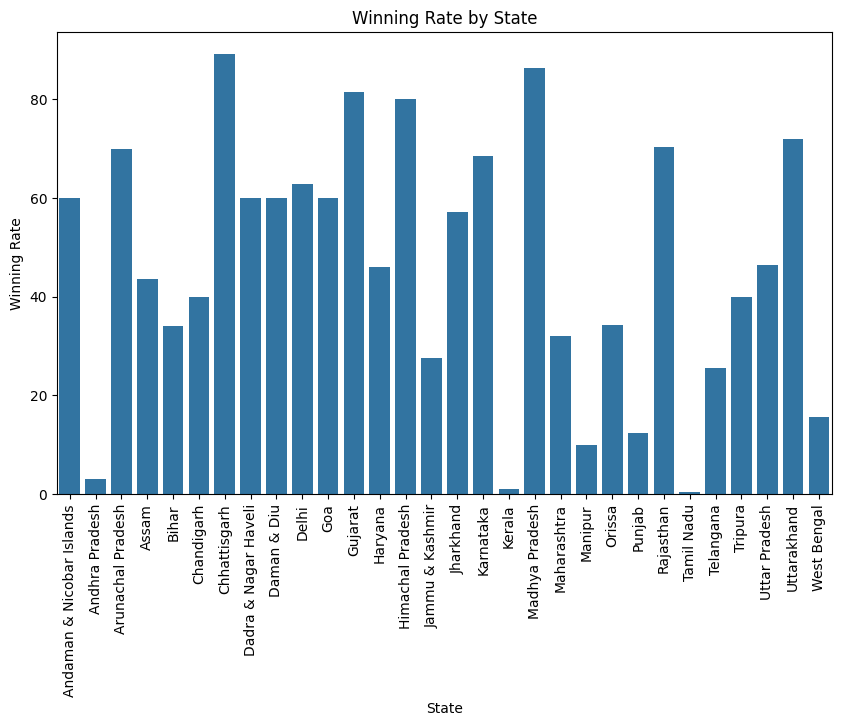

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Winning_Rate', data=bjp)
plt.title('Winning Rate by State')
plt.xlabel('State')
plt.ylabel('Winning Rate')
plt.xticks(rotation=90)
plt.show

In [26]:
gujarat = bjp[bjp['State'] == 'Gujarat']
gujarat

mp = bjp[bjp['State'] == 'Madhya Pradesh']
mp

up = bjp[bjp['State'] == 'Uttar Pradesh']
up

andhraPradesh = bjp[bjp['State'] == 'Andhra Pradesh']
andhraPradesh

bihar = bjp[bjp['State'] == 'Bihar']
bihar

assam = bjp[bjp['State'] == 'Assam']
assam

kerala = bjp[bjp['State'] == 'Kerala']
kerala

tamilNadu = bjp[bjp['State'] == 'Tamil Nadu']
tamilNadu


,State,Party,Winning_Count,Total_Elections,Winning_Rate
141,Tamil Nadu,Bharatiya Janta Party,1,194,0.515464


In [27]:
from scipy.stats import kruskal

In [28]:
H0 = "There is no significant difference in the success rate of Party bjp across different states."

Ha = "There is a significant difference in the success rate of Party bjp across different states."

alpha = 0.05

_, p = kruskal(tamilNadu['Winning_Rate'], kerala['Winning_Rate'] , gujarat['Winning_Rate'] , bihar['Winning_Rate'] , andhraPradesh['Winning_Rate'] , assam['Winning_Rate'] , mp['Winning_Rate'] , up['Winning_Rate'])
print("p-value =", p)
if p < alpha:
  print("Reject H0 and hence,")
  print(Ha)
else:
  print("Failed to reject H0 and hence,")
  print(H0)

p-value = 0.42887985755305486
Failed to reject H0 and hence,
There is no significant difference in the success rate of Party bjp across different states.


In [29]:
congress = win_counts[win_counts['Party'] == 'Indian National Congress']
congress

,State,Party,Winning_Count,Total_Elections,Winning_Rate
1,Andaman & Nicobar Islands,Indian National Congress,2,5,40.000000
6,Andhra Pradesh,Indian National Congress,62,159,38.993711
12,Arunachal Pradesh,Indian National Congress,3,10,30.000000
20,Assam,Indian National Congress,25,69,36.231884
26,Bihar,Indian National Congress,11,200,5.500000
34,Chandigarh,Indian National Congress,3,5,60.000000
36,Chhattisgarh,Indian National Congress,6,55,10.909091
42,Daman & Diu,Indian National Congress,1,5,20.000000
44,Delhi,Indian National Congress,13,35,37.142857
46,Goa,Indian National Congress,4,10,40.000000


In [30]:
congress.sort_values(by='Winning_Rate', ascending=False)

,State,Party,Winning_Count,Total_Elections,Winning_Rate
105,Manipur,Indian National Congress,7,10,70.000000
125,Pondicherry,Indian National Congress,3,5,60.000000
34,Chandigarh,Indian National Congress,3,5,60.000000
78,Kerala,Indian National Congress,50,100,50.000000
108,Meghalaya,Indian National Congress,5,10,50.000000
51,Haryana,Indian National Congress,24,50,48.000000
130,Punjab,Indian National Congress,28,65,43.076923
112,Mizoram,Indian National Congress,2,5,40.000000
86,Lakshadweep,Indian National Congress,2,5,40.000000
1,Andaman & Nicobar Islands,Indian National Congress,2,5,40.000000


In [31]:
congress.describe()

,Winning_Count,Total_Elections,Winning_Rate
count,33.000000,33.000000,33.000000
mean,16.545455,81.575758,29.808764
std,16.261709,90.978717,16.866409
min,1.000000,5.000000,5.500000
25%,4.000000,10.000000,18.041237
50%,10.000000,51.000000,25.490196
75%,25.000000,130.000000,40.000000
max,62.000000,400.000000,70.000000


<function matplotlib.pyplot.show(close=None, block=None)>

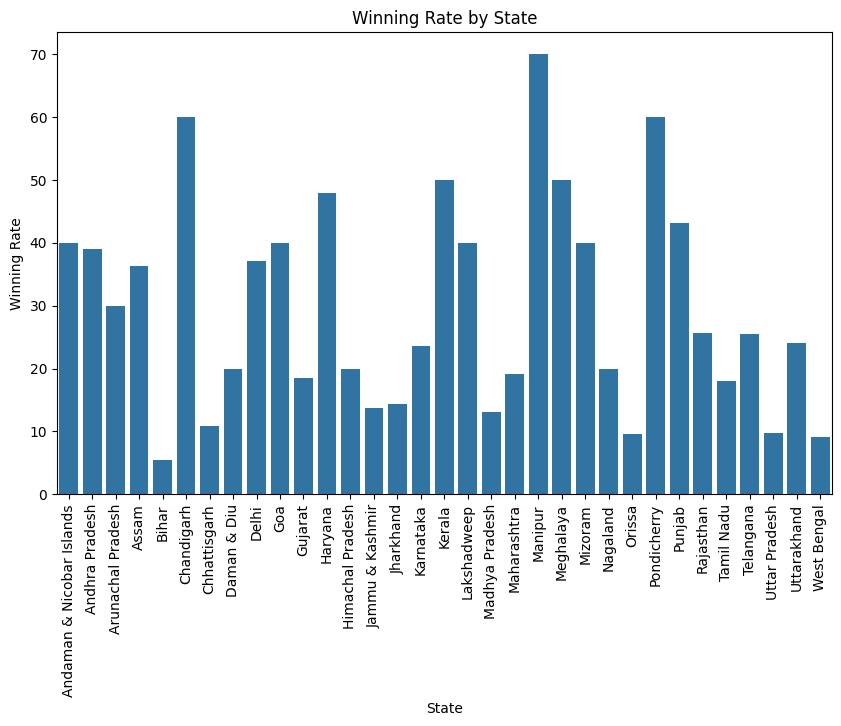

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Winning_Rate', data=congress)
plt.title('Winning Rate by State')
plt.xlabel('State')
plt.ylabel('Winning Rate')
plt.xticks(rotation=90)
plt.show


In [33]:
Manipur = congress[congress['State'] == 'Manipur']
Manipur

Lakshadweep	 = congress[congress['State'] == 'Lakshadweep']
Lakshadweep

Punjab = congress[congress['State'] == 'Punjab']
Punjab

,State,Party,Winning_Count,Total_Elections,Winning_Rate
130,Punjab,Indian National Congress,28,65,43.076923


In [34]:
H0 = "There is no significant difference in the success rate of Party congress across different states."

Ha = "There is a significant difference in the success rate of Party congress across different states."


alpha = 0.05

_, p = kruskal(Manipur['Winning_Rate'], Lakshadweep['Winning_Rate'], Punjab['Winning_Rate'])
print("p-value =", p)
if p < alpha:
  print("Reject H0 and hence,")
  print(Ha)
else:
  print("Failed to reject H0 and hence,")
  print(H0)

p-value = 0.36787944117144245
Failed to reject H0 and hence,
There is no significant difference in the success rate of Party congress across different states.


#Caste and Voter Turnout:

**Research Question: Does the caste composition of a constituency significantly affect voter turnout?**

* **Null Hypothesis (H0): The caste composition of a constituency does not significantly affect voter turnout.**

* **Alternative Hypothesis (H1): The caste composition of a constituency significantly affects voter turnout.**

In [46]:
df

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,4.9,2004
1,Adoor,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,8.0,2004
2,Agra,GEN,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,8.9,2004
3,Ahmedabad,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,14.2,2004
4,Ahmednagar,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,10.9,2004
...,...,...,...,...,...,...,...,...,...,...,...
2708,Wardha,GEN,Maharashtra,Amar Sharadrao Kale,Nationalist Congress Party – Sharadchandra Pawar,1682771,1095012,65.1,81648,7.5,2024
2709,Wayanad,GEN,Kerala,Rahul Gandhi,Indian National Congress,1462423,1084653,74.2,364422,33.6,2024
2710,West Delhi,GEN,Delhi,Kamaljeet Sehrawat,Bharatiya Janta Party,2587977,1524494,58.9,199013,13.1,2024
2711,Yavatmal-Washi,GEN,Maharashtra,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),1940916,1225530,63.1,94473,7.7,2024


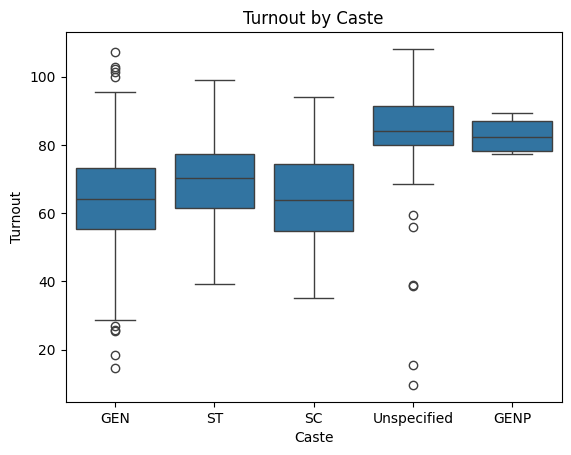

In [50]:
sns.boxplot(x='Caste', y='Turnout', data=df)
plt.title('Turnout by Caste')
plt.xlabel('Caste')
plt.ylabel('Turnout')
plt.show()

In [59]:
GEN = df[df['Caste'] == 'GEN']['Turnout']
OBC = df[df['Caste'] == 'OBC']['Turnout']
SC = df[df['Caste'] == 'SC']['Turnout']
ST = df[df['Caste'] == 'ST']['Turnout']
GENP = df[df['Caste'] == 'GENP']['Turnout']
Unspencified = df[df['Caste'] == 'Unspecified']['Turnout']
print(GEN)
print(OBC)
print(SC)
print(ST)
print(GENP)
print(Unspencified)

0       72.8
1       71.1
2       44.9
3       39.7
4       53.0
        ... 
2708    65.1
2709    74.2
2710    58.9
2711    63.1
2712    75.3
Name: Turnout, Length: 2006, dtype: float64
Series([], Name: Turnout, dtype: float64)
12      49.8
14      77.7
15      70.7
27      66.7
33      66.4
        ... 
2675    60.1
2678    79.9
2690    73.7
2703    76.7
2707    69.5
Name: Turnout, Length: 414, dtype: float64
9       80.1
37      69.3
44      60.9
45      71.3
81      69.0
        ... 
2661    73.3
2682    81.2
2685    81.6
2686    67.2
2698    73.2
Name: Turnout, Length: 231, dtype: float64
1665    89.2
1666    78.5
2206    86.2
2207    77.3
Name: Turnout, dtype: float64
1644    108.1
1652     91.1
1655     91.2
1656      9.7
1664     82.6
1694     94.0
1697     38.9
1760     93.7
1795     95.3
1827     91.3
1841     94.5
1865     80.2
1882     93.7
1885     88.6
1934     87.9
1937     76.4
1939     94.4
1946     97.1
2006     93.3
2007     93.8
2008     91.9
2012     89.3
2020     

In [54]:
GEN.describe()

count    2006.000000
mean       63.907328
std        12.091469
min        14.700000
25%        55.400000
50%        64.150000
75%        73.200000
max       107.100000
Name: Turnout, dtype: float64

In [55]:
SC.describe()

count    414.000000
mean      64.198068
std       12.779918
min       35.300000
25%       54.900000
50%       63.950000
75%       74.525000
max       94.000000
Name: Turnout, dtype: float64

In [56]:
ST.describe()

count    231.000000
mean      68.986580
std       11.429666
min       39.300000
25%       61.450000
50%       70.300000
75%       77.350000
max       99.000000
Name: Turnout, dtype: float64

In [57]:
GENP.describe()

count     4.000000
mean     82.800000
std       5.809762
min      77.300000
25%      78.200000
50%      82.350000
75%      86.950000
max      89.200000
Name: Turnout, dtype: float64

In [60]:
Unspencified.describe()

count     58.000000
mean      81.034483
std       17.911141
min        9.700000
25%       80.025000
50%       84.150000
75%       91.275000
max      108.100000
Name: Turnout, dtype: float64

In [64]:
H0 = "The caste composition of a constituency does not significantly affect voter turnout."
Ha = "The caste composition of a constituency significantly affects voter turnout."

alpha = 0.05
f, p = f_oneway(GEN,SC,ST,GENP,Unspencified)
print("p-value =", p)
if p < alpha:
  print("Reject H0 and hence,")
  print(Ha)
else:
  print("Failed to reject H0 and hence,")
  print(H0)

p-value = 3.385849573314127e-30
Reject H0 and hence,
The caste composition of a constituency significantly affects voter turnout.


#Party Performance Comparison
**Research Question: Is there a significant difference in the average margin of victory between two political parties?**  
**Null Hypothesis (H0): There is no significant difference in the average margin of victory between Party A and Party B.**  
**Alternative Hypothesis (H1): There is a significant difference in the average margin of victory between Party A and Party B.**

In [37]:
h0 = "There is no significant difference in the average margin of victory between # Bharatiya Janta Party and # Indian National Congress."
ha = "There is a significant difference in the average margin of victory between # Bharatiya Janta Party and # Indian National Congress."

#Find Avg Margin and Standard Deviation of both Parties--->

party_wise = df.groupby('Party')

bjp = party_wise.get_group('Bharatiya Janta Party')
congress = party_wise.get_group('Indian National Congress')

bjp_mu = bjp['Margin'].mean()
congress_mu = congress['Margin'].mean()

bjp_sig = bjp['Margin'].std()
congress_sig = congress['Margin'].std()

bjp_n = len(bjp)
congress_n = len(congress)

# Hypothesis Testing Using Z - Test--->
alpha = 0.05

z = (bjp_mu - congress_mu) / np.sqrt((bjp_sig**2/bjp_n) + (congress_sig**2/congress_n))
print("The Value of z is : --> " , z)
p = 1 - stats.norm.cdf(z)
print("The Value of p is : --> " , p)

if p < alpha:
  print("Reject H0 and therefore")
  print(ha)
else:
  print("Failed to reject H0 and therefore")
  print(h0)

The Value of z is : -->  13.182491259899788
The Value of p is : -->  0.0
Reject H0 and therefore
There is a significant difference in the average margin of victory between # Bharatiya Janta Party and # Indian National Congress.


#Yearly Comparison of Turnout
**Research Question: Is there a significant difference in voter turnout between the 2019 and 2024 Lok Sabha elections?**

*   **Null Hypothesis (H0)**: There is no significant difference in voter turnout between the 2019 and 2024 elections.
*   **Alternative Hypothesis (H1)**: There is a significant difference in voter turnout between the 2019 and 2024 elections.


In [38]:
h0 =  'There is no significant difference in voter turnout between the 2019 and 2024 elections'
ha =  'There is a significant difference in voter turnout between the 2019 and 2024 elections'

# Find Avg of Voter Turnout of both Years 2019 & 2024

year_wise = df.groupby('Year')
mu_2019 = year_wise.get_group(2019)['Turnout'].mean()
mu_2024 = year_wise.get_group(2024)['Turnout'].mean()
sig_2019 = year_wise.get_group(2019)['Turnout'].std()
sig_2024 = year_wise.get_group(2024)['Turnout'].std()
n_2019 = len(year_wise.get_group(2019))
n_2024 = len(year_wise.get_group(2024))

# Hypothesis Testing Using Z - Test--->
alpha = 0.05

z = (mu_2019 - mu_2024) / np.sqrt((sig_2019**2/n_2019) + (sig_2024**2/n_2024))
print("The Value of z is : --> " , z)

p = 1 - stats.norm.cdf(z)
print("The Value of p is : --> " , p)

if p < alpha:
  print("Reject H0 and therefore")
  print(ha)
else:
  print("Failed to reject H0 and therefore")
  print(h0)


The Value of z is : -->  6.557352250221948
The Value of p is : -->  2.7385760326126274e-11
Reject H0 and therefore
There is a significant difference in voter turnout between the 2019 and 2024 elections


#Voter Turnout Comparison Across States

**we can perform a hypothesis test, such as a t-test, to determine if there is a significant difference between their means.**  
**Null Hypothesis (H0): There is no significant difference in voter turnout between State X and State Y.**  
**Alternative Hypothesis (H1): There is a significant difference in voter turnout between State X and State Y.**

In [41]:
# Replace 'State X' and 'State Y' with the actual state names
state_x_data = df[df['State'] == 'Gujarat']['Turnout']
state_y_data = df[df['State'] == 'Rajasthan']['Turnout']


In [42]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(state_x_data, state_y_data)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: -0.6368114643243447
P-Value: 0.5248234231402269


**If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no significant difference in voter turnout between the two states**

#Impact of Number of Electors on Turnout:

**Null Hypothesis (H0): The number of electors has no significant effect on voter turnout percentage.**                                         
                       **Alternative Hypothesis (H1): The number of electors has a significant effect on voter turnout percentage.**

In [44]:
#Regression Analysis
# Define the independent variable (Electors) and the dependent variable (Turnout)
X = df['Electors']
y = df['Turnout']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Turnout   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     53.55
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           3.30e-13
Time:                        08:15:02   Log-Likelihood:                -10699.
No. Observations:                2713   AIC:                         2.140e+04
Df Residuals:                    2711   BIC:                         2.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9432      1.008     71.368      0.0

In [45]:
# Interpretation
p_value = model.pvalues[1]  # p-value for the 'Electors' coefficient

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between the number of electors and the number of votes received by the winning candidate.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between the number of electors and the number of votes received by the winning candidate.")

Reject the null hypothesis. There is a significant relationship between the number of electors and the number of votes received by the winning candidate.


#ExitPoll & Openion Poll

In [66]:
!gdown 1Ty64IIP3eCaYcBUyY7RFWcNvtOxrKcmcDYHIIoi40zA

Downloading...
From (original): https://drive.google.com/uc?id=1Ty64IIP3eCaYcBUyY7RFWcNvtOxrKcmcDYHIIoi40zA
From (redirected): https://docs.google.com/spreadsheets/d/1Ty64IIP3eCaYcBUyY7RFWcNvtOxrKcmcDYHIIoi40zA/export?format=xlsx
To: /content/ExitPoll.xlsx
5.38kB [00:00, 12.5MB/s]


In [67]:
df_exit_polls = pd.read_excel('ExitPoll.xlsx')
df_exit_polls

,Agency,NDA,INDIA,Lead
0,ABP News-CVoter,368,167,96
1,Dainik Bhaskar,316,173,44
2,DB Live,221,275,3
3,India Today-Axis My India,381,148,109
4,India TV-CNX,386,134,96
5,NDTV-Jan Ki Baat,377,151,105
6,News18-CNBC,362,132,90
7,News 24-Today's Chanakya,400,107,128
8,News Nation,360,161,88
9,Republic TV-Matrize,360,126,88


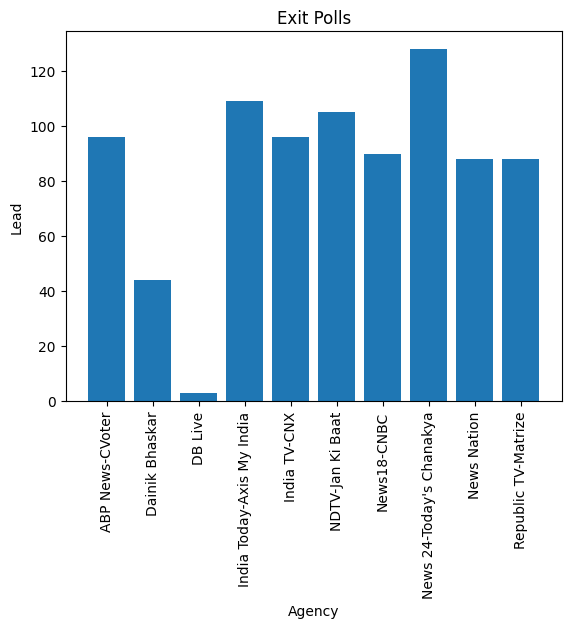

In [69]:
plt.bar(df_exit_polls['Agency'],df_exit_polls['Lead'])
plt.title('Exit Polls')
plt.xlabel('Agency')
plt.ylabel('Lead')
plt.xticks(rotation=90)
plt.show()

In [70]:
df_exit_polls.sort_values(by='INDIA')

,Agency,NDA,INDIA,Lead
7,News 24-Today's Chanakya,400,107,128
9,Republic TV-Matrize,360,126,88
6,News18-CNBC,362,132,90
4,India TV-CNX,386,134,96
3,India Today-Axis My India,381,148,109
5,NDTV-Jan Ki Baat,377,151,105
8,News Nation,360,161,88
0,ABP News-CVoter,368,167,96
1,Dainik Bhaskar,316,173,44
2,DB Live,221,275,3


In [71]:
!gdown 1v4I7904kgHVYyAF-U9BjvfWThAlqfeVNgqFB9o0Ylf4

Downloading...
From (original): https://drive.google.com/uc?id=1v4I7904kgHVYyAF-U9BjvfWThAlqfeVNgqFB9o0Ylf4
From (redirected): https://docs.google.com/spreadsheets/d/1v4I7904kgHVYyAF-U9BjvfWThAlqfeVNgqFB9o0Ylf4/export?format=xlsx
To: /content/OpinionPoll.xlsx
5.50kB [00:00, 17.8MB/s]


In [72]:
df_opinion_polls = pd.read_excel('OpinionPoll.xlsx')
df_opinion_polls

,Agency,Date,Sample,Margin error,NDA,INDIA,Others
0,TV9 Bharatvarsh - People's Insight - Polstrat,April 2024[236],2500000,0.03,362,149,32
1,Times Now-ETG,April 2024[237],"271,292[238]",±3%,384,118,41
2,News18,March 2024[239],"118,616[240]",±4%,411,105,27
3,India TV-CNX,March 2024[242],"162,900[243]",±3%,378,98,67
4,Zee News-Matrize,February 2024[218],167843,±2%,377,93,73
5,India Today-CVoter,February 2024[245],"149,092[246]",±3–5%,335,166,42
6,Times Now-ETG,February 2024[247],156843,±2%,366,104,73
7,India TV-CNX,October 2023[227][228],54250,±3%,315,172,56
8,India Today-CVoter,August 2023[234],160438,±3–5%,306,193,54
9,India Today-CVoter,January 2023[249],140917,±3–5%,298,153,92


In [73]:
df_opinion_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Agency        10 non-null     object
 1   Date          10 non-null     object
 2   Sample        10 non-null     object
 3   Margin error  10 non-null     object
 4   NDA           10 non-null     int64 
 5   INDIA         10 non-null     int64 
 6   Others        10 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 688.0+ bytes


In [74]:
df_exit_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Agency  10 non-null     object
 1   NDA     10 non-null     int64 
 2   INDIA   10 non-null     int64 
 3   Lead    10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [76]:
ex = pd.DataFrame(df_exit_polls['NDA'].reset_index(drop=True))
ex

,NDA
0,368
1,316
2,221
3,381
4,386
5,377
6,362
7,400
8,360
9,360


In [79]:
ex['NDA'] = ex['NDA'].astype(int)
ex

,NDA
0,368
1,316
2,221
3,381
4,386
5,377
6,362
7,400
8,360
9,360


In [81]:
op = pd.DataFrame(df_opinion_polls['NDA'].reset_index(drop=True))
op

,NDA
0,362
1,384
2,411
3,378
4,377
5,335
6,366
7,315
8,306
9,298


In [83]:
op['NDA'] = op['NDA'].astype(int)
op

,NDA
0,362
1,384
2,411
3,378
4,377
5,335
6,366
7,315
8,306
9,298


In [84]:
op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NDA     10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


In [87]:
h0 = 'exit polls and opinion polls are similar'
h1 = 'exit polls and opinion polls are not similar'
alpha = 0.01

_ , p = ttest_ind(ex['NDA'], op['NDA'])
print("P - Value : " , p)

if(p<alpha):

  print("h0 is rejected and hence",h1)
else:
  print("h0 is not rejected and hence",h0)


P - Value :  0.9960997056527717
h0 is not rejected and hence exit polls and opinion polls are similar


In [88]:
df

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,4.9,2004
1,Adoor,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,8.0,2004
2,Agra,GEN,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,8.9,2004
3,Ahmedabad,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,14.2,2004
4,Ahmednagar,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,10.9,2004
...,...,...,...,...,...,...,...,...,...,...,...
2708,Wardha,GEN,Maharashtra,Amar Sharadrao Kale,Nationalist Congress Party – Sharadchandra Pawar,1682771,1095012,65.1,81648,7.5,2024
2709,Wayanad,GEN,Kerala,Rahul Gandhi,Indian National Congress,1462423,1084653,74.2,364422,33.6,2024
2710,West Delhi,GEN,Delhi,Kamaljeet Sehrawat,Bharatiya Janta Party,2587977,1524494,58.9,199013,13.1,2024
2711,Yavatmal-Washi,GEN,Maharashtra,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),1940916,1225530,63.1,94473,7.7,2024


In [127]:
dm = df.groupby('Party')['Turnout'].mean()
dm

Party
Aam Aadmi Party                             69.150000
Aazad Samaj Party (Kanshi Ram)              60.900000
Ajsu Party                                  67.800000
All India Anna Dravida Munnetra Kazhagam    73.625532
All India Forward Bloc                      78.340000
                                              ...    
United Peoples Party Liberal                83.600000
Viduthalai Chiruthaigal Katchi              77.700000
Voice Of The People Party                   74.100000
Yuvajana Sramika Rythu Congress Party       86.571429
Zoram People’s Movement                     57.400000
Name: Turnout, Length: 78, dtype: float64

In [122]:
# dm_10 = dm.sort_values(by='Turnout',ascending=False).head(10)
# dm_10
dm_10 = dm.nlargest(10)
dm_10

Party
Naga Peoples Front                          90.750000
Nagaland Peoples Front                      90.700000
Yuvajana Sramika Rythu Congress Party       86.571429
Asom Gana Parishad                          85.700000
All India United Democratic Front           85.675000
Nationalist Democratic Progressive Party    84.700000
Sikkim Krantikari Morcha                    84.600000
United Peoples Party Liberal                83.600000
Janasena Party                              83.300000
All India N.R. Congress                     82.100000
Name: Turnout, dtype: float64

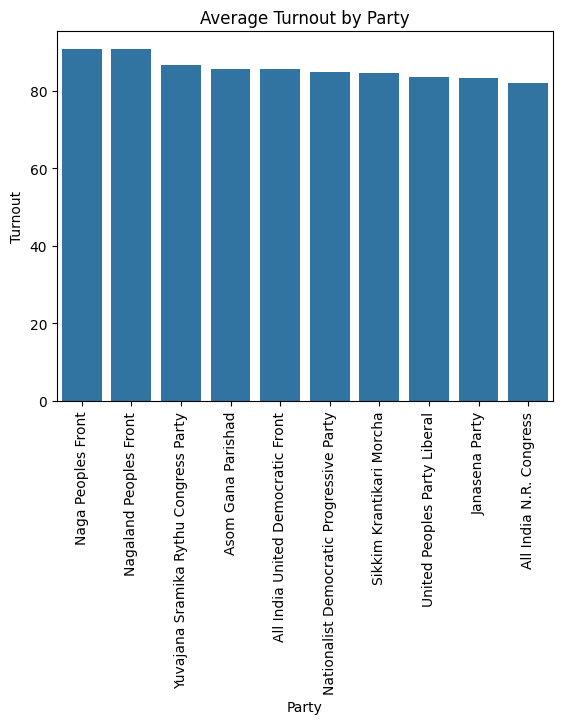

In [128]:
sns.barplot(x=dm_10.index,y=dm_10.values)
plt.ylabel('Turnout')
plt.xlabel('Party')
plt.title('Average Turnout by Party')
plt.xticks(rotation=90)
plt.show()

In [129]:
df_bjp = df.loc[df['Party']=='Bharatiya Janta Party']
df_bjp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 3 to 2710
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            1078 non-null   object 
 1   Caste              1078 non-null   object 
 2   State              1078 non-null   object 
 3   Winning Candidate  1078 non-null   object 
 4   Party              1078 non-null   object 
 5   Electors           1078 non-null   int64  
 6   Votes              1078 non-null   int64  
 7   Turnout            1078 non-null   float64
 8   Margin             1078 non-null   int64  
 9   Margin %           1078 non-null   float64
 10  Year               1078 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 101.1+ KB


In [133]:
df_inc = df.loc[df['Party']=='Indian National Congress']
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 8 to 2712
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            546 non-null    object 
 1   Caste              546 non-null    object 
 2   State              546 non-null    object 
 3   Winning Candidate  546 non-null    object 
 4   Party              546 non-null    object 
 5   Electors           546 non-null    int64  
 6   Votes              546 non-null    int64  
 7   Turnout            546 non-null    float64
 8   Margin             546 non-null    int64  
 9   Margin %           546 non-null    float64
 10  Year               546 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 51.2+ KB


In [134]:
h0 = 'The winning party does not significantly influence voter turnout in the constituencies they win.'
ha = 'The winning party significantly influences voter turnout in the constituencies they win.'

alpha = 0.05

_ , p = ttest_ind(df_bjp['Turnout'], df_inc['Turnout'])
print(p)

if(p<alpha):
  print("h0 is rejected and hence",ha)
else:
  print("h0 is not rejected and hence",h0)

0.03560457758658298
h0 is rejected and hence The winning party significantly influences voter turnout in the constituencies they win.
